In [10]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import numba
from scipy.linalg import lstsq

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Volumes/Disk3/STAVER-revised/validation20_293T/validation20_HEK293T_report.tsv", sep="\t")  
df.columns

Index(['File.Name', 'Run', 'Protein.Group', 'Protein.Ids', 'Protein.Names',
       'Genes', 'PG.Quantity', 'PG.Normalised', 'PG.MaxLFQ', 'Genes.Quantity',
       'Genes.Normalised', 'Genes.MaxLFQ', 'Genes.MaxLFQ.Unique',
       'Modified.Sequence', 'Stripped.Sequence', 'Precursor.Id',
       'Precursor.Charge', 'Q.Value', 'PEP', 'Global.Q.Value',
       'Protein.Q.Value', 'PG.Q.Value', 'Global.PG.Q.Value', 'GG.Q.Value',
       'Translated.Q.Value', 'Proteotypic', 'Precursor.Quantity',
       'Precursor.Normalised', 'Precursor.Translated', 'Translated.Quality',
       'Ms1.Translated', 'Quantity.Quality', 'RT', 'RT.Start', 'RT.Stop',
       'iRT', 'Predicted.RT', 'Predicted.iRT', 'Lib.Q.Value', 'Lib.PG.Q.Value',
       'Ms1.Profile.Corr', 'Ms1.Area', 'Evidence', 'Spectrum.Similarity',
       'Averagine', 'Mass.Evidence', 'CScore', 'Decoy.Evidence',
       'Decoy.CScore', 'Fragment.Quant.Raw', 'Fragment.Quant.Corrected',
       'Fragment.Correlations', 'MS2.Scan', 'IM', 'iIM', 'Predicted

In [3]:
df.head(10)

,File.Name,Run,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,PG.MaxLFQ,Genes.Quantity,...,Decoy.Evidence,Decoy.CScore,Fragment.Quant.Raw,Fragment.Quant.Corrected,Fragment.Correlations,MS2.Scan,IM,iIM,Predicted.IM,Predicted.iIM
0,/public/home/proteome/ranpeng/validation_293T/...,Exp0016_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,9.017630e+09,9.189330e+09,0.0,NaN,...,4.86539,2.669260e-02,7.01941e+06;7.01941e+06;7.01941e+06;7.01941e+0...,7.01941e+06;7.01941e+06;7.01941e+06;7.01941e+0...,0.962909;0.962909;0.962909;0.962909;0.962909;0...,10790,0,0,0,0
1,/public/home/proteome/ranpeng/validation_293T/...,Exp0020_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,9.263610e+09,9.535340e+09,0.0,NaN,...,4.16125,2.853210e-01,6.19442e+06;6.19442e+06;6.19442e+06;6.19442e+0...,6.19442e+06;6.19442e+06;6.19442e+06;6.19442e+0...,0.976298;0.976298;0.976298;0.976298;0.976298;0...,10850,0,0,0,0
2,/public/home/proteome/ranpeng/validation_293T/...,Exp0004_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,8.973760e+09,8.844770e+09,0.0,NaN,...,3.23943,1.885640e-01,5.45056e+06;5.45056e+06;5.45056e+06;5.45056e+0...,5.45056e+06;5.45056e+06;5.45056e+06;5.45056e+0...,0.973643;0.973643;0.973643;0.973643;0.973643;0...,10790,0,0,0,0
3,/public/home/proteome/ranpeng/validation_293T/...,Exp0005_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,9.064430e+09,9.240570e+09,0.0,NaN,...,5.06872,3.687200e-02,6.36881e+06;6.36881e+06;6.36881e+06;6.36881e+0...,6.36881e+06;6.36881e+06;6.36881e+06;6.36881e+0...,0.98174;0.98174;0.98174;0.98174;0.98174;0.9817...,10760,0,0,0,0
4,/public/home/proteome/ranpeng/validation_293T/...,Exp0021_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,8.964930e+09,8.968850e+09,0.0,NaN,...,4.91582,5.584780e-02,6.02185e+06;6.02185e+06;6.02185e+06;6.02185e+0...,6.02185e+06;6.02185e+06;6.02185e+06;6.02185e+0...,0.957893;0.957893;0.957893;0.957893;0.957893;0...,10850,0,0,0,0
5,/public/home/proteome/ranpeng/validation_293T/...,Exp0018_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,9.164390e+09,9.135880e+09,0.0,NaN,...,5.10464,4.296860e-02,5.55167e+06;5.55167e+06;5.55167e+06;5.55167e+0...,5.55167e+06;5.55167e+06;5.55167e+06;5.55167e+0...,0.977267;0.977267;0.977267;0.977267;0.977267;0...,10790,0,0,0,0
6,/public/home/proteome/ranpeng/validation_293T/...,Exp0019_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,8.895220e+09,8.743370e+09,0.0,NaN,...,3.23943,7.335370e-02,6.7262e+06;6.7262e+06;6.7262e+06;6.7262e+06;6....,6.7262e+06;6.7262e+06;6.7262e+06;6.7262e+06;6....,0.968278;0.968278;0.968278;0.968278;0.968278;0...,10790,0,0,0,0
7,/public/home/proteome/ranpeng/validation_293T/...,Exp0009_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,8.911960e+09,8.803590e+09,0.0,NaN,...,3.72966,4.786400e-02,6.26921e+06;6.26921e+06;6.26921e+06;6.26921e+0...,6.26921e+06;6.26921e+06;6.26921e+06;6.26921e+0...,0.956586;0.956586;0.956586;0.956586;0.956586;0...,10790,0,0,0,0
8,/public/home/proteome/ranpeng/validation_293T/...,Exp0010_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,9.084680e+09,8.814560e+09,0.0,NaN,...,3.23943,9.010150e-02,6.72323e+06;6.72323e+06;6.72323e+06;6.72323e+0...,6.72323e+06;6.72323e+06;6.72323e+06;6.72323e+0...,0.969255;0.969255;0.969255;0.969255;0.969255;0...,10820,0,0,0,0
9,/public/home/proteome/ranpeng/validation_293T/...,Exp0007_STD_DingC_293T_HFX1_10min_8cm_100ng_DI...,NaN,NaN,NaN,NaN,9.133070e+09,8.906830e+09,0.0,NaN,...,0.00000,-1.000000e+07,6.69927e+06;6.69927e+06;6.69927e+06;6.69927e+0...,6.69927e+06;6.69927e+06;6.69927e+06;6.69927e+0...,0.964217;0.964217;0.964217;0.964217;0.964217;0...,10760,0,0,0,0


In [4]:
def create_synthetic_data(num_peptides, num_samples, nan_ratio=0.1):
    """
    Generates a synthetic dataset of peptide intensities.

    Args:
        num_peptides (int): Number of peptides (rows).
        num_samples (int): Number of samples (columns).
        nan_ratio (float): Proportion of NaN values in the dataset.

    Returns:
        pd.DataFrame: DataFrame with synthetic peptide intensities.
    """
    # Create a DataFrame with random values
    data = np.random.rand(num_peptides, num_samples) * 1000  # Scale to mimic intensity values
    data = pd.DataFrame(data, columns=[f'Sample_{i+1}' for i in range(num_samples)])

    # Introduce NaN values
    nan_indices = np.random.choice(data.size, int(nan_ratio * data.size), replace=False)
    data.values[np.unravel_index(nan_indices, data.shape)] = np.nan

    return data

# Create a larger synthetic dataset
num_peptides = 10  # Number of peptides
num_samples = 100    # Number of samples
nan_ratio = 0.02     # 10% of the data will be NaN

synthetic_data = create_synthetic_data(num_peptides, num_samples, nan_ratio)
synthetic_data


,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_91,Sample_92,Sample_93,Sample_94,Sample_95,Sample_96,Sample_97,Sample_98,Sample_99,Sample_100
0,876.057760,971.570759,167.044325,788.719339,491.167230,308.052313,761.527127,599.312922,346.475548,273.165141,...,237.576964,662.171515,464.569852,372.178326,756.823304,508.137901,770.556030,225.106326,380.547998,931.794904
1,579.677026,274.378442,127.618369,239.888598,280.538778,83.353535,935.478447,160.122769,756.170172,724.325851,...,348.995055,933.279735,993.627582,253.350376,364.153871,430.284726,231.953490,921.908812,932.019717,572.281433
2,825.265807,586.750116,821.575198,937.706504,888.616880,919.096654,169.166275,721.642233,300.947134,620.090508,...,702.687108,641.529030,461.042138,299.908341,350.889551,728.611229,110.615229,221.993881,430.822519,40.175054
3,745.540192,591.090928,115.186592,816.963809,330.105609,545.843036,785.843183,296.656385,493.375762,773.015740,...,470.860622,155.422129,56.914958,672.969723,119.478618,810.952005,585.349965,931.032542,252.039951,797.051837
4,57.113744,915.895144,263.938925,613.775585,360.932986,530.159223,298.497067,700.394043,643.865353,601.145420,...,455.272979,790.673112,181.609821,809.761365,703.977843,922.605384,560.050628,461.360304,308.709876,240.514265
5,71.411824,765.987267,NaN,170.667612,513.441690,733.429668,786.341085,210.056796,13.625651,6.897458,...,487.679714,876.077727,34.306756,146.091831,810.052271,699.868153,814.400829,556.006924,201.571112,687.112099
6,135.858719,506.906627,950.408541,653.465439,782.112972,992.974930,752.395530,725.703626,186.189624,862.057576,...,691.054541,768.621029,837.311490,NaN,302.092505,636.262083,610.828664,473.769642,167.982303,13.421252
7,NaN,391.166074,310.777588,561.244767,307.040702,126.409523,815.258351,400.317151,804.954775,727.840399,...,826.944095,781.817994,987.619852,673.286348,61.234920,548.577430,721.246828,60.848796,873.976022,157.375055
8,981.362216,136.986013,550.827620,186.488684,NaN,62.302839,191.217850,837.217331,497.782981,545.530887,...,891.939416,64.996369,668.698467,919.765051,96.279441,672.780436,268.010301,90.391340,557.794384,601.828184
9,598.492289,763.767538,620.705306,455.758338,110.695303,411.886768,847.530643,373.421812,789.145935,898.178253,...,793.093727,158.092325,273.918754,985.567551,22.719734,741.922091,690.775711,467.683724,NaN,639.141185


In [5]:
def create_synthetic_test_data(num_proteins=100, num_samples=10, max_peptides_per_protein=10):
    data = []
    peptide_info = []  # 存储肽段和蛋白质的信息

    for protein_id in range(num_proteins):
        num_peptides = np.random.randint(1, max_peptides_per_protein + 1)
        for peptide_id in range(num_peptides):
            mean_intensity = np.random.uniform(1, 3)  # 随机平均强度
            sigma_intensity = np.random.uniform(0.3, 1.0)  # 随机标准差
            peptide_intensity = np.random.lognormal(mean=mean_intensity, sigma=sigma_intensity, size=num_samples)

            # 更高概率为低强度肽段引入缺失值
            missing_probability = np.clip(1 / peptide_intensity, 0, 1)
            missing_indices = np.random.uniform(size=num_samples) < missing_probability
            peptide_intensity[missing_indices] = np.nan

            data.append(peptide_intensity)
            peptide_info.append(f"Protein_{protein_id}_Peptide_{peptide_id}")

    # 引入样本特异性扰动
    sample_specific_effects = np.random.normal(loc=0, scale=0.2, size=num_samples)
    data = np.array(data) + sample_specific_effects

    # 创建DataFrame
    df = pd.DataFrame(data.transpose(), columns=peptide_info)
    df.index.name = 'Sample'
    return df.T

# 创建合成DIA数据
synthetic_data = create_synthetic_test_data()
synthetic_data

Sample,0,1,2,3,4,5,6,7,8,9
Protein_0_Peptide_0,NaN,1.709055,9.673092,NaN,4.426152,12.585447,NaN,5.258866,14.397215,10.746634
Protein_0_Peptide_1,12.978909,NaN,NaN,7.159317,9.605268,NaN,3.722262,10.500220,NaN,NaN
Protein_0_Peptide_2,21.337815,44.846324,6.770006,22.837654,24.146781,NaN,92.198615,17.623432,4.036008,21.546145
Protein_1_Peptide_0,8.219143,18.145286,NaN,72.935631,25.135302,31.483366,52.779366,4.575257,39.761342,37.151311
Protein_1_Peptide_1,22.724124,7.445195,13.457848,35.215627,14.518535,7.944017,14.444968,9.697380,8.645977,4.160179
...,...,...,...,...,...,...,...,...,...,...
Protein_99_Peptide_1,2.762173,2.331130,NaN,3.714993,2.581172,NaN,8.661803,4.657985,2.666509,2.364073
Protein_99_Peptide_2,18.497476,21.785550,22.350360,6.331544,NaN,5.892864,8.457935,12.268477,NaN,5.358598
Protein_99_Peptide_3,12.312756,16.179611,7.827736,15.640423,14.719752,16.744997,17.845147,8.073400,6.596229,10.386505
Protein_99_Peptide_4,15.116285,7.559214,4.474301,19.963304,9.659869,11.024621,7.659817,5.166000,6.141200,5.979996


In [6]:
import numpy as np
import pandas as pd

def generate_peptide_data(n_peptides, n_samples, missing_data_rate=0.1):
    """
    Generates proteomics data with missing values.

    This function creates a DataFrame of proteomics data (e.g., peptide or protein abundances)
    for a given number of peptides and samples. It introduces missing values to simulate a
    typical proteomics dataset.

    Args:
        n_peptides (int): The number of peptides (or proteins), corresponding to the number of rows.
        n_samples (int): The number of samples, corresponding to the number of columns.
        missing_data_rate (float, optional): The proportion of missing values in each sample. Defaults to 0.1.

    Returns:
        pd.DataFrame: A DataFrame containing the generated proteomics data. Each row represents a peptide (or protein),
                      and each column represents a sample. Missing data are represented by NaN values.

    Example:
        >>> peptide_data = generate_peptide_data(100, 10, 0.1)
        >>> print(peptide_data.head())
    """
    np.random.seed(0)
    data = np.random.lognormal(mean=2, sigma=0.5, size=(n_peptides, n_samples))

    # Introduce missing values, ensuring approximately 'missing_data_rate' missingness per sample
    for col in range(n_samples):
        missing_indices = np.random.choice(n_peptides, size=int(n_peptides * missing_data_rate), replace=False)
        data[missing_indices, col] = np.nan

    return pd.DataFrame(data, columns=[f'Sample_{i+1}' for i in range(n_samples)])


peptide_intensities = generate_peptide_data(10, 5, 0.22)
peptide_intensities

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5
0,17.850405,9.025723,12.053668,NaN,NaN
1,4.532896,11.882232,6.850498,7.017385,9.072966
2,NaN,15.289048,10.810511,7.852544,9.225133
3,8.730627,NaN,6.668673,8.641134,4.820859
4,NaN,10.245200,NaN,5.098353,22.985816
5,3.570898,7.560061,6.728876,15.901121,NaN
6,7.984273,8.927008,NaN,2.744508,6.209274
7,7.989870,13.669203,13.479768,6.088103,6.352501
8,4.374199,3.632754,3.148307,19.597220,5.726897
9,5.935569,NaN,10.899808,NaN,6.643440


In [10]:
import numpy as np
import pandas as pd
from scipy import linalg

def maxLFQ(X):
    """
    Calculates the maximum likelihood fold change estimates for each column 
    of the input DataFrame using the MaxLFQ algorithm.

    Args:
        X (pd.DataFrame): DataFrame with peptide intensities.

    Returns:
        dict: A dictionary with keys 'estimate' and 'annotation'.
    """
    if X.empty or X.isna().all().all():
        return {"estimate": np.nan, "annotation": "Empty or all NaN DataFrame"}

    N = X.shape[1]
    g = np.full(N, np.nan)  # Group label

    def spread(i, label):
        """
        Recursive function to assign group labels to non-NaN values.
        """
        nonlocal g
        g[i] = label
        for j in range(N):
            if not np.isnan(X.iloc[:, i][j]) and np.isnan(g[j]):
                spread(j, label)

    # Assign group labels
    label = 0
    for i in range(N):
        if np.isnan(g[i]):
            spread(i, label)
            label += 1

    # Function to calculate maxLFQ for a group
    def maxLFQ_do(group_data):
        N = group_data.shape[1]
        AtA = np.zeros((N, N))
        Atb = np.zeros((N, 1))

        for i in range(N - 1):
            for j in range(i + 1, N):
                r_i_j = np.nanmedian(-group_data.iloc[:, i] + group_data.iloc[:, j])
                if not np.isnan(r_i_j):
                    AtA[i, j] = AtA[j, i] = -1
                    AtA[i, i] += 1
                    AtA[j, j] += 1
                    Atb[i] -= r_i_j
                    Atb[j] += r_i_j

        augmented_ATA = np.vstack([2 * AtA, np.ones((1, N))])
        augmented_ATb = np.vstack([2 * Atb, [np.nanmean(group_data.to_numpy()) * N]])
        
        res = linalg.lstsq(augmented_ATA, augmented_ATb, cond=None)[0]
        return res[:-1].flatten()

    w = np.full(N, np.nan)
    for i in range(label):
        group_indices = g == i
        if np.sum(group_indices) > 1:
            estimates = maxLFQ_do(X.iloc[:, group_indices])
            w[group_indices] = estimates

    if np.isnan(w).all():
        return {"estimate": w, "annotation": "NA"}

    annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
    return {"estimate": w, "annotation": annotation}

In [11]:
def maxLFQ_corrected(X):
    """
    Corrected version of maxLFQ function to handle array assignment issues.
    """
    if X.empty or X.isna().all().all():
        return {"estimate": np.nan, "annotation": "Empty or all NaN DataFrame"}

    N = X.shape[1]
    g = np.full(N, np.nan)  # Group label

    def spread(i, label):
        nonlocal g
        g[i] = label
        for j in range(N):
            if not np.isnan(X.iloc[:, j][i]) and np.isnan(g[j]):
                spread(j, label)

    # Assign group labels
    label = 0
    for i in range(N):
        if np.isnan(g[i]):
            spread(i, label)
            label += 1

    def maxLFQ_do(group_data):
        N = group_data.shape[1]
        AtA = np.zeros((N, N))
        Atb = np.zeros((N, 1))

        for i in range(N - 1):
            for j in range(i + 1, N):
                r_i_j = np.nanmedian(-group_data.iloc[:, i] + group_data.iloc[:, j])
                if not np.isnan(r_i_j):
                    AtA[i, j] = AtA[j, i] = -1
                    AtA[i, i] += 1
                    AtA[j, j] += 1
                    Atb[i] -= r_i_j
                    Atb[j] += r_i_j

        augmented_ATA = np.vstack([2 * AtA, np.ones((1, N))])
        augmented_ATb = np.vstack([2 * Atb, [np.nanmean(group_data.to_numpy()) * N]])
        
        res = linalg.lstsq(augmented_ATA, augmented_ATb, cond=None)[0]
        return res[:-1].flatten()

    w = np.full(N, np.nan)
    for i in range(label):
        group_indices = g == i
        if np.sum(group_indices) > 1:
            estimates = maxLFQ_do(X.iloc[:, group_indices].transpose())  # Transpose for correct shape
            w[group_indices] = estimates[:np.sum(group_indices)]  # Correct size mismatch

    if np.isnan(w).all():
        return {"estimate": w, "annotation": "NA"}

    annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
    return {"estimate": w, "annotation": annotation}

# 重试使用修正后的 maxLFQ 函数计算数据
maxLFQ_results_corrected = maxLFQ_corrected(peptide_intensities)

maxLFQ_results_corrected


{'estimate': array([12.20011498,  8.615394  , 11.81896625,  7.07452736, 11.33537744]),
 'annotation': ''}

In [12]:
def maxLFQ_corrected(X):
    if X.empty or X.isna().all().all():
        return {"estimate": np.nan, "annotation": "Empty or all NaN DataFrame"}

    N = X.shape[1]
    g = np.full(N, np.nan)  # Group label

    def spread(i, label):
        nonlocal g
        g[i] = label
        for j in range(N):
            if not np.isnan(X.iloc[:, j][i]) and np.isnan(g[j]):
                spread(j, label)

    # Assign group labels
    label = 0
    for i in range(N):
        if np.isnan(g[i]):
            spread(i, label)
            label += 1

    def maxLFQ_do(group_data):
        N = group_data.shape[1]
        if N < 2:  # If only one sample in the group, return NaN
            return [np.nan]

        AtA = np.zeros((N, N))
        Atb = np.zeros((N, 1))

        for i in range(N - 1):
            for j in range(i + 1, N):
                r_i_j = np.nanmedian(-group_data.iloc[:, i] + group_data.iloc[:, j])
                if not np.isnan(r_i_j):
                    AtA[i, j] = AtA[j, i] = -1
                    AtA[i, i] += 1
                    AtA[j, j] += 1
                    Atb[i] -= r_i_j
                    Atb[j] += r_i_j

        augmented_ATA = np.vstack([2 * AtA, np.ones((1, N))])
        augmented_ATb = np.vstack([2 * Atb, [np.nanmean(group_data.to_numpy()) * N]])

        res = linalg.lstsq(augmented_ATA, augmented_ATb, cond=None)[0]
        return res[:-1].flatten()

    w = np.full(N, np.nan)
    for i in range(label):
        group_indices = g == i
        if np.sum(group_indices) > 0:  # Changed to 0 to include groups with a single sample
            estimates = maxLFQ_do(X.iloc[:, group_indices].transpose())
            w[group_indices] = estimates[:np.sum(group_indices)]

    if np.isnan(w).all():
        return {"estimate": w, "annotation": "NA"}

    annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
    return {"estimate": w, "annotation": annotation}

# 使用修改后的函数计算数据
maxLFQ_results_corrected = maxLFQ_corrected(peptide_intensities)
print(maxLFQ_results_corrected)


{'estimate': array([12.20011498,  8.615394  , 11.81896625,  7.07452736, 11.33537744]), 'annotation': ''}


In [14]:
def maxLFQ(X):
    """
    Perform the maxLFQ algorithm on a given set of protein/peptide abundance data.

    This function applies the maxLFQ (maximum label-free quantification) algorithm,
    which is used for estimating the abundance of proteins/peptides in mass spectrometry-based
    proteomics data. It includes handling of missing values and grouping of samples for comparison.

    Args:
        X (pd.DataFrame): A DataFrame containing the protein/peptide abundance data. Rows represent
                            proteins/peptides, and columns represent samples.

    Returns:
        dict: A dictionary with two keys: 'estimate' containing the estimated abundances and
                'annotation' containing group annotations.

    Example:
        >>> data = pd.DataFrame(np.random.rand(10, 5), columns=['Sample1', 'Sample2', 'Sample3', 'Sample4', 'Sample5'])
        >>> result = maxLFQ(data)
        >>> print(result)

    Note:
        This is an optimized version of the algorithm, designed for large-scale computations.
    """
    # Check if all data are missing
    if X.isna().all().all():
        return pd.DataFrame({'estimate': [np.nan], 'annotation': ["NA"]})

    # Handle single row case
    if len(X) == 1:
        return pd.DataFrame({'estimate': X.iloc[0].tolist(), 'annotation': [""]})
    
    # Initialize variables
    N = X.shape[1]

    # Spread function optimized with vectorization
    def spread(i, g, cc, X):
        g[i] = cc
        for r in range(X.shape[0]):
            if not pd.isna(X.iloc[r, i]):
                for k in range(X.shape[1]):
                    if not pd.isna(X.iloc[r, k]) and pd.isna(g[k]):
                        spread(k, g, cc, X)

    # maxLFQ 算法实现
    # maxLFQ calculation with vectorization
    def maxLFQ_do(X_sub):
        N = X_sub.shape[1]
        AtA = np.zeros((N, N))
        Atb = np.zeros(N)

        for i in range(N - 1):
            for j in range(i + 1, N):
                r_i_j = np.nanmedian(X_sub.iloc[:, j] - X_sub.iloc[:, i])
                if not np.isnan(r_i_j):
                    AtA[i, j] = AtA[j, i] = -1
                    AtA[i, i] += 1
                    AtA[j, j] += 1

                    Atb[i] -= r_i_j
                    Atb[j] += r_i_j

        A = np.vstack([np.hstack([2 * AtA, np.ones(N).reshape(-1, 1)]), 
                       np.hstack([np.ones(N), np.zeros(1)])])
        b = np.append(2 * Atb, np.nanmean(X_sub.to_numpy()) * N)

        res = lstsq(A, b, cond=None, overwrite_a=False, overwrite_b=False, check_finite=True, lapack_driver='gelsy')[0]
        return res[:N]

    # Applying the maxLFQ algorithm
    cc = 0
    g = [np.nan] * N
    for i in range(N):
        if pd.isna(g[i]):
            cc += 1
            spread(i, g, cc, X)

    w = [np.nan] * N
    for i in range(1, cc + 1):
        ind = [idx for idx, val in enumerate(g) if val == i]
        if len(ind) == 1:
            w[ind[0]] = np.nanmedian(X.iloc[:, ind[0]])
        else:
            X_sub = X.iloc[:, ind]
            results = maxLFQ_do(X_sub)
            for index, res in zip(ind, results):
                w[index] = res

    # Preparing final result
    # if all(pd.isna(w)):
    #     annotation = ["NA"]
    # else:
    #     quantified_samples = [idx for idx, val in enumerate(w) if not pd.isna(val)]
    #     if all(g[q] == g[quantified_samples[0]] for q in quantified_samples):
    #         annotation = [""]
    #     else:
    #         g = [np.nan if pd.isna(val) else val for val in g]
    #         annotation = [";".join(map(str, g))]

    # return {'estimate': w, 'annotation': annotation * len(w)}

    if np.isnan(w).all():
        return {"estimate": w, "annotation": "NA"}

    annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
    return {"estimate": w, "annotation": annotation}

In [15]:
# 运行maxLFQ函数
result = maxLFQ(peptide_intensities)
result

{'estimate': [7.792173167112335,
  11.102255622331738,
  9.356774778136408,
  8.044980180538738,
  8.180982133873842],
 'annotation': ''}

In [24]:
# 生成一个更大的样本数据集 (10, 100)
peptide_intensities2 = generate_peptide_data(10, 100, 0.22)
peptide_intensities2

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_91,Sample_92,Sample_93,Sample_94,Sample_95,Sample_96,Sample_97,Sample_98,Sample_99,Sample_100
0,17.850405,NaN,12.053668,22.656496,NaN,4.532896,11.882232,6.850498,NaN,NaN,...,NaN,13.615686,NaN,12.041024,8.830249,NaN,7.427951,18.046202,7.873133,9.033995
1,18.945669,3.766403,3.914774,11.997501,4.110063,19.527243,6.008592,5.084886,19.326380,15.490972,...,3.871227,NaN,7.245341,4.120412,9.598802,6.781693,10.868789,11.153486,21.793635,14.414923
2,NaN,6.555539,12.804924,NaN,NaN,NaN,7.299727,5.108902,8.499117,NaN,...,5.397610,5.809453,23.381810,4.349201,NaN,NaN,NaN,9.889532,6.051314,8.890897
3,3.844858,16.929630,6.965142,5.258842,10.310796,5.868741,3.791913,NaN,NaN,6.822413,...,9.812383,6.610521,NaN,3.292881,6.385829,5.049322,11.347097,13.073025,NaN,11.316660
4,5.477633,NaN,10.840960,8.829924,3.051798,8.826344,11.103495,7.609997,6.736046,4.934127,...,4.415108,6.202971,12.808925,NaN,28.448972,7.120925,5.316013,5.713793,4.441442,7.106946
5,8.947429,7.263624,NaN,6.572486,6.210707,NaN,3.266381,3.374058,4.097680,14.164149,...,9.695443,9.202926,6.620888,NaN,8.810023,8.931798,5.841476,NaN,4.640962,6.757854
6,3.403435,9.103504,4.608101,8.323240,3.658373,5.501227,6.991921,3.220865,7.826958,6.113052,...,8.717115,11.877231,3.486163,3.037900,5.661272,12.748006,6.214438,4.966333,8.157874,NaN
7,3.587767,4.033879,4.981173,12.772816,8.309594,21.457553,11.801455,7.260527,13.909039,8.213248,...,5.058473,7.206317,4.717597,14.242567,NaN,4.713963,7.669820,4.312210,5.975503,4.879378
8,14.963083,10.945210,NaN,NaN,11.827872,9.048528,NaN,NaN,3.176834,6.985014,...,5.346324,NaN,11.765885,6.768922,3.629301,20.065021,NaN,NaN,NaN,6.037463
9,NaN,5.250273,8.879742,8.126707,4.826567,18.381814,NaN,4.086369,11.945405,14.361219,...,NaN,8.080037,4.954463,8.334419,8.538286,9.083280,6.691249,7.745377,4.162827,NaN


In [17]:
# 运行maxLFQ函数
result = maxLFQ(peptide_intensities2)
result

{'estimate': [8.51562267353195,
  7.859950499802911,
  8.313074910520653,
  9.902046816542349,
  6.697658025229186,
  10.518710294527452,
  8.114808864179537,
  5.818185442692922,
  9.059378117253207,
  9.485996608563635,
  6.913112169201505,
  10.230660531731127,
  8.079258341729673,
  7.464532981538619,
  7.36370683628841,
  10.260621863040319,
  8.459421658041066,
  8.66341740940778,
  11.113257660588216,
  8.909807704432387,
  7.29774641191867,
  6.99435205135715,
  6.876596696227521,
  7.848872240614421,
  6.32643344648773,
  7.330855016462108,
  8.619684558361831,
  14.850114276622936,
  8.24390764341658,
  11.304154359295914,
  6.903183056246564,
  7.349956249653259,
  7.7778527552893655,
  6.890904285736555,
  6.3255799655644855,
  9.052957054543333,
  9.60022911196084,
  9.177251231972576,
  8.456780986596735,
  8.57713004193207,
  6.808471541271598,
  6.490286733917995,
  9.08725981034465,
  10.76009164073651,
  7.843595632645482,
  7.137739035319218,
  9.330387642922156,
  8

In [135]:
def maxLFQ(X):
    """
    Perform the maxLFQ algorithm on a given set of protein/peptide abundance data.

    This function applies the maxLFQ (maximum label-free quantification) algorithm,
    which is used for estimating the abundance of proteins/peptides in mass spectrometry-based
    proteomics data. It includes handling of missing values and grouping of samples for comparison.

    Args:
        X (pd.DataFrame): A DataFrame containing the protein/peptide abundance data. Rows represent
                            proteins/peptides, and columns represent samples.

    Returns:
        dict: A dictionary with two keys: 'estimate' containing the estimated abundances and
                'annotation' containing group annotations.

    Example:
        >>> data = pd.DataFrame(np.random.rand(10, 5), columns=['Sample1', 'Sample2', 'Sample3', 'Sample4', 'Sample5'])
        >>> result = maxLFQ(data)
        >>> print(result)

    Note:
        This is an optimized version of the algorithm, designed for large-scale computations.
    """
    # Check if all data are missing
    if X.isna().all().all():
        return pd.DataFrame({'estimate': [np.nan], 'annotation': ["NA"]})

    # Handle single row case
    if len(X) == 1:
        return pd.DataFrame({'estimate': X.iloc[0].tolist(), 'annotation': [""]})
    
    # Initialize variables
    N = X.shape[1]

    # Spread function optimized with vectorization
    def spread(i, g, cc, X):
        g[i] = cc
        for r in range(X.shape[0]):
            if not pd.isna(X.iloc[r, i]):
                for k in range(X.shape[1]):
                    if not pd.isna(X.iloc[r, k]) and pd.isna(g[k]):
                        spread(k, g, cc, X)

    # maxLFQ 算法实现
    # maxLFQ calculation with vectorization
    def maxLFQ_do(X_sub):
        N = X_sub.shape[1]
        AtA = np.zeros((N, N))
        Atb = np.zeros(N)

        for i in range(N - 1):
            for j in range(i + 1, N):
                r_i_j = np.nanmedian(X_sub.iloc[:, j] - X_sub.iloc[:, i])
                if not np.isnan(r_i_j):
                    AtA[i, j] = AtA[j, i] = -1
                    AtA[i, i] += 1
                    AtA[j, j] += 1

                    Atb[i] -= r_i_j
                    Atb[j] += r_i_j

        A = np.vstack([np.hstack([2 * AtA, np.ones(N).reshape(-1, 1)]), 
                       np.hstack([np.ones(N), np.zeros(1)])])
        b = np.append(2 * Atb, np.nanmean(X_sub.to_numpy()) * N)

        res = lstsq(A, b, cond=None, overwrite_a=False, overwrite_b=False, check_finite=True, lapack_driver='gelsy')[0]
        return res[:N]

    # Applying the maxLFQ algorithm
    cc = 0
    g = [np.nan] * N
    for i in range(N):
        if pd.isna(g[i]):
            cc += 1
            spread(i, g, cc, X)

    w = [np.nan] * N
    for i in range(1, cc + 1):
        ind = [idx for idx, val in enumerate(g) if val == i]
        if len(ind) == 1:
            w[ind[0]] = np.nanmedian(X.iloc[:, ind[0]])
        else:
            X_sub = X.iloc[:, ind]
            results = maxLFQ_do(X_sub)
            for index, res in zip(ind, results):
                w[index] = res

    # Preparing final results
    if np.isnan(w).all():
        return {"estimate": w, "annotation": "NA"}

    annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
    return {"estimate": w, "annotation": annotation}

## 利用 `numpy` 优化该算法的计算速度

To optimize the calculation speed of the maxLFQ function, you can make the following improvements:
- Use NumPy functions instead of pandas functions for faster computation.
- Avoid unnecessary iterations and calculations. 
- Utilize vectorized operations for improved performance.

This optimized `maxLFQ_optimal_v1` version fuction uses `NumPy arrays` instead of `pandas DataFrames`, avoids
unnecessary iterations, and utilizes vectorized operations for improved performance.

Here's the optimized version of the code:

In [18]:
import numpy as np
from scipy.linalg import lstsq

def maxLFQ_optimal_v1(X):
    """
    Perform the maxLFQ algorithm on a given set of protein/peptide abundance data.

    This function applies the maxLFQ (maximum label-free quantification) algorithm,
    which is used for estimating the abundance of proteins/peptides in mass spectrometry-based
    proteomics data. It includes handling of missing values and grouping of samples for comparison.

    Args:
        X (np.ndarray): A 2D array containing the protein/peptide abundance data. Rows represent
                        proteins/peptides, and columns represent samples.

    Returns:
        dict: A dictionary with two keys: 'estimate' containing the estimated abundances and
                'annotation' containing group annotations.

    Example:
        >>> data = np.random.rand(10, 5)
        >>> result = maxLFQ(data)
        >>> print(result)

    Note:
        This is an optimized version of the algorithm, designed for large-scale computations.
    """
    try:
        # Check if array is empty or all values are NaN
        if X.size == 0:
            raise ValueError("Input array is empty.")
        if np.isnan(X).all():
            raise ValueError("All values in the input array are NaN.")

        # Handle single row case
        if X.shape[0] == 1:
            return {'estimate': X[0], 'annotation': [""]}

        N = X.shape[1]

        def spread(i, g, cc):
            # Spread function for assigning group labels
            g[i] = cc
            for r in range(X.shape[0]):
                if not np.isnan(X[r, i]):
                    for k in range(X.shape[1]):
                        if not np.isnan(X[r, k]) and np.isnan(g[k]):
                            spread(k, g, cc)

        def maxLFQ_do(X_sub):
            # maxLFQ algorithm implementation
            N = X_sub.shape[1]
            AtA = np.zeros((N, N))
            Atb = np.zeros(N)

            for i in range(N - 1):
                for j in range(i + 1, N):
                    r_i_j = np.nanmedian(X_sub[:, j] - X_sub[:, i])
                    if not np.isnan(r_i_j):
                        AtA[i, j] = AtA[j, i] = -1
                        AtA[i, i] += 1
                        AtA[j, j] += 1
                        Atb[i] -= r_i_j
                        Atb[j] += r_i_j

            A = np.vstack([np.hstack([2 * AtA, np.ones((N, 1))]), 
                           np.hstack([np.ones(N), 0])])
            b = np.append(2 * Atb, np.nanmean(X_sub) * N)

            res = lstsq(A, b, lapack_driver='gelsy')[0]
            return res[:N]

        # Applying the maxLFQ algorithm
        cc = 0
        g = np.full(N, np.nan)
        for i in range(N):
            if np.isnan(g[i]):
                cc += 1
                spread(i, g, cc)

        w = np.full(N, np.nan)
        for i in range(1, cc + 1):
            ind = np.where(g == i)[0]
            if len(ind) == 1:
                w[ind[0]] = np.nanmedian(X[:, ind[0]])
            else:
                X_sub = X[:, ind]
                results = maxLFQ_do(X_sub)
                w[ind] = results

        # Check for all NaN results
        if np.isnan(w).all():
            raise ValueError("maxLFQ calculation resulted in all NaN values.")

        # Preparing final results
        annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
        return {"estimate": w, "annotation": annotation}

    except ValueError as ve:
        return {"error": str(ve)}
    except Exception as e:
        return {"error": f"An unexpected error occurred: {str(e)}"}


## Execution Time Comparison

In [25]:
%time maxLFQ(peptide_intensities2)

CPU times: user 2.16 s, sys: 10.7 ms, total: 2.17 s
Wall time: 2.18 s


{'estimate': [8.51562267353195,
  7.859950499802911,
  8.313074910520653,
  9.902046816542349,
  6.697658025229186,
  10.518710294527452,
  8.114808864179537,
  5.818185442692922,
  9.059378117253207,
  9.485996608563635,
  6.913112169201505,
  10.230660531731127,
  8.079258341729673,
  7.464532981538619,
  7.36370683628841,
  10.260621863040319,
  8.459421658041066,
  8.66341740940778,
  11.113257660588216,
  8.909807704432387,
  7.29774641191867,
  6.99435205135715,
  6.876596696227521,
  7.848872240614421,
  6.32643344648773,
  7.330855016462108,
  8.619684558361831,
  14.850114276622936,
  8.24390764341658,
  11.304154359295914,
  6.903183056246564,
  7.349956249653259,
  7.7778527552893655,
  6.890904285736555,
  6.3255799655644855,
  9.052957054543333,
  9.60022911196084,
  9.177251231972576,
  8.456780986596735,
  8.57713004193207,
  6.808471541271598,
  6.490286733917995,
  9.08725981034465,
  10.76009164073651,
  7.843595632645482,
  7.137739035319218,
  9.330387642922156,
  8

In [26]:
%time maxLFQ_optimal_v1(peptide_intensities2.to_numpy())

CPU times: user 240 ms, sys: 6.72 ms, total: 246 ms
Wall time: 243 ms


{'estimate': array([ 8.51562267,  7.8599505 ,  8.31307491,  9.90204682,  6.69765803,
        10.51871029,  8.11480886,  5.81818544,  9.05937812,  9.48599661,
         6.91311217, 10.23066053,  8.07925834,  7.46453298,  7.36370684,
        10.26062186,  8.45942166,  8.66341741, 11.11325766,  8.9098077 ,
         7.29774641,  6.99435205,  6.8765967 ,  7.84887224,  6.32643345,
         7.33085502,  8.61968456, 14.85011428,  8.24390764, 11.30415436,
         6.90318306,  7.34995625,  7.77785276,  6.89090429,  6.32557997,
         9.05295705,  9.60022911,  9.17725123,  8.45678099,  8.57713004,
         6.80847154,  6.49028673,  9.08725981, 10.76009164,  7.84359563,
         7.13773904,  9.33038764,  8.47722139,  6.09428816,  7.65637689,
         6.67630583,  5.86157531,  8.77043143,  7.39364996,  7.49609355,
        11.05437813,  7.77074979,  5.89838641,  7.3018969 ,  6.47077498,
         7.89238044,  7.58221201,  9.20732246,  7.70049893,  7.39929613,
         7.42253564,  7.29201858,  8.96

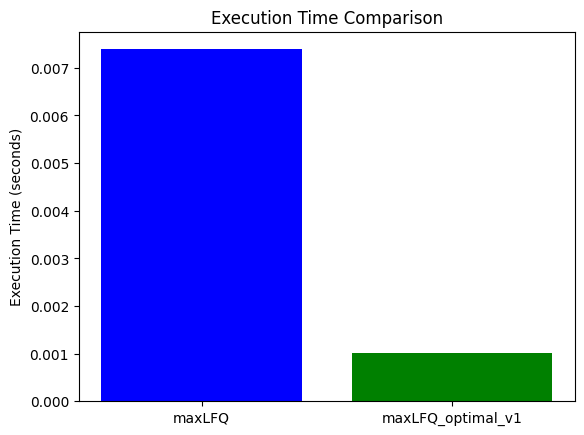

In [34]:
import time
import matplotlib.pyplot as plt

def compare_execution_time(functions, data, labels=None):
    """
    Measures the execution time of multiple functions and plots a bar chart.

    Args:
        functions (list): A list of functions to be tested. These functions should accept the same arguments.
        data: The input data to be passed to each function. Ensure the data format is suitable for all functions.
        labels (list of str, optional): A list of labels for each function. Defaults to the names of the functions.

    Raises:
        ValueError: If the number of provided labels does not match the number of functions.

    Usage:
        >>> def test_func1(data):
        ...     # Simulate some computation
        ...     time.sleep(1)
        >>> def test_func2(data):
        ...     # Simulate some other computation
        ...     time.sleep(2)
        >>> data = [1, 2, 3]  # Data for testing the functions
        >>> compare_execution_time([test_func1, test_func2], data, ['Function 1', 'Function 2'])

    This function will output a bar chart of the execution times for test_func1 and test_func2.
    """
    if labels is None:
        labels = [f.__name__ for f in functions]
    elif len(labels) != len(functions):
        raise ValueError("Number of labels must match number of functions.")

    times = []
    for func in functions:
        start_time = time.time()
        if func.__name__ == 'maxLFQ':
            func(data)
        else:
            func(data.to_numpy())
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

    plt.bar(labels, times, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time Comparison')
    plt.show()

# Example usage
# Compare the maxLFQ and maxLFQ_optimal_v1 fuctions, and a dataset peptide_intensities
compare_execution_time([maxLFQ, maxLFQ_optimal_v1], peptide_intensities, ['maxLFQ', 'maxLFQ_optimal_v1'])

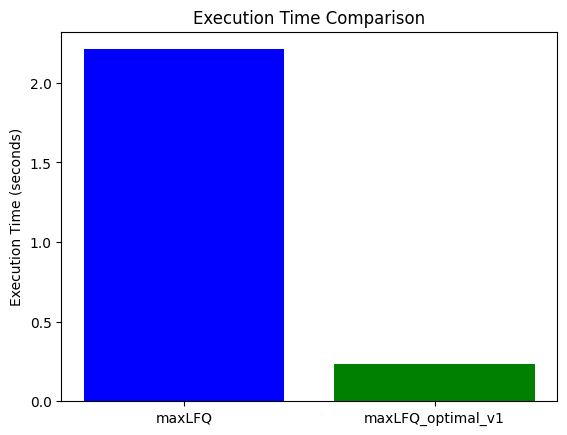

In [35]:
# Compare the maxLFQ and maxLFQ_optimal_v1 fuctions, and a dataset peptide_intensities
compare_execution_time([maxLFQ, maxLFQ_optimal_v1], peptide_intensities2, ['maxLFQ', 'maxLFQ_optimal_v1'])

## 进一步优化maxLFQ函数

To further optimize the calculation speed of the maxLFQ_optimal function, you can make the following improvements:
- Use `Numba` to JIT compile the code for faster execution.
- Utilize Numba's parallel processing capabilities to speed up the calculations.

This optimized version uses Numba's JIT compilation and parallel processing
capabilities to further improve the calculation speed of `the maxLFQ_optimal_v2` function.

Here's the optimized version of the code:

In [39]:
import numpy as np
from scipy.linalg import lstsq
import numba

@numba.jit
def spread(i, g, cc, X):
    # 优化后的 spread 函数
    g[i] = cc
    for r in range(X.shape[0]):
        if not np.isnan(X[r, i]):
            for k in range(X.shape[1]):
                if not np.isnan(X[r, k]) and np.isnan(g[k]):
                    spread(k, g, cc, X)

@numba.jit
def maxLFQ_do(X_sub):
    # 优化后的 maxLFQ_do 函数
    N = X_sub.shape[1]
    AtA = np.zeros((N, N))
    Atb = np.zeros(N)

    for i in range(N - 1):
        for j in range(i + 1, N):
            r_i_j = np.nanmedian(X_sub[:, j] - X_sub[:, i])
            if not np.isnan(r_i_j):
                AtA[i, j] = AtA[j, i] = -1
                AtA[i, i] += 1
                AtA[j, j] += 1
                Atb[i] -= r_i_j
                Atb[j] += r_i_j

    A = np.vstack([np.hstack([2 * AtA, np.ones((N, 1))]),
                    np.hstack([np.ones(N), 0])])
    b = np.append(2 * Atb, np.nanmean(X_sub) * N)

    res = lstsq(A, b, lapack_driver='gelsy')[0]

    return res[:N]

def maxLFQ_optimal_v2(X):
    # 检查数据是否全部为空
    if X.size == 0:
        return {"estimate": np.nan, "annotation": "Empty array"}
    if np.isnan(X).all():
        return {"estimate": np.nan, "annotation": "All NaN values"}

    # 处理单行数据
    if X.shape[0] == 1:
        return {"estimate": X[0], "annotation": [""]}

    N = X.shape[1]

    # 使用 numba 加速的函数调用
    cc = 0
    g = np.full(N, np.nan)
    for i in range(N):
        if np.isnan(g[i]):
            cc += 1
            spread(i, g, cc, X)

    w = np.full(N, np.nan)
    for i in range(1, cc + 1):
        ind = np.where(g == i)[0]
        if len(ind) == 1:
            w[ind[0]] = np.nanmedian(X[:, ind[0]])
        else:
            X_sub = X[:, ind]
            results = maxLFQ_do(X_sub)
            w[ind] = results

    # Check for all NaN results
    if np.isnan(w).all():
        return {"estimate": w, "annotation": "NA"}
    
    # Preparing final results
    annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
    return {"estimate": w, "annotation": annotation}


In [40]:
%time maxLFQ_optimal_v2(peptide_intensities.to_numpy())

CPU times: user 1.95 s, sys: 40.6 ms, total: 1.99 s
Wall time: 2.05 s


{'estimate': array([ 7.79217317, 11.10225562,  9.35677478,  8.04498018,  8.18098213]),
 'annotation': ''}

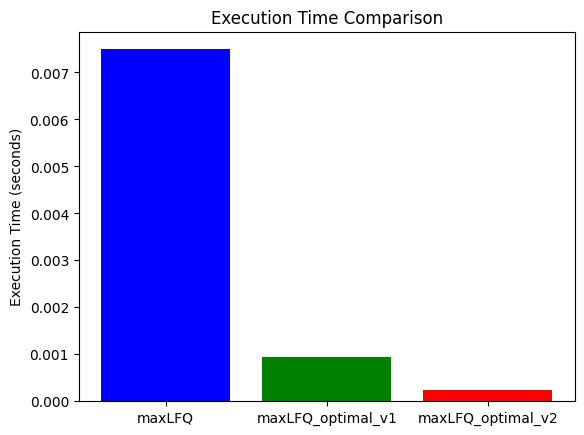

In [41]:
# Compare the maxLFQ maxLFQ_optimal_v1, and maxLFQ_optimal_v2 fuctions, and a dataset peptide_intensities
compare_execution_time([maxLFQ, maxLFQ_optimal_v1, maxLFQ_optimal_v2], peptide_intensities, ['maxLFQ', 'maxLFQ_optimal_v1', 'maxLFQ_optimal_v2'])

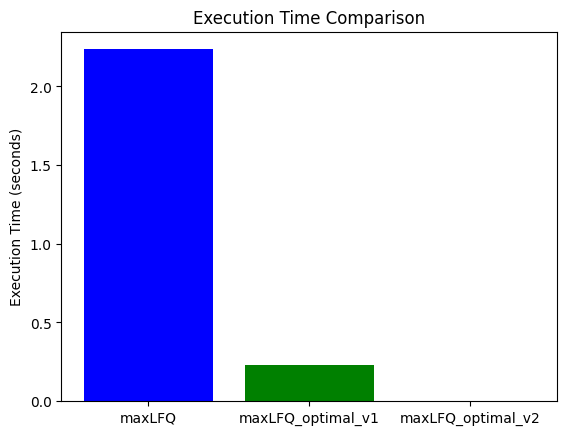

In [43]:
# Compare the maxLFQ maxLFQ_optimal_v1, and maxLFQ_optimal_v2 fuctions, and a more large dataset peptide_intensities2
compare_execution_time([maxLFQ, maxLFQ_optimal_v1, maxLFQ_optimal_v2], peptide_intensities2, ['maxLFQ', 'maxLFQ_optimal_v1', 'maxLFQ_optimal_v2'])

In [7]:
# 生成一个更大的样本数据集 (10, 500)
peptide_intensities3 = generate_peptide_data(10, 500, 0.22)
peptide_intensities3

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_491,Sample_492,Sample_493,Sample_494,Sample_495,Sample_496,Sample_497,Sample_498,Sample_499,Sample_500
0,17.850405,9.025723,12.053668,22.656496,18.798536,4.532896,11.882232,6.850498,7.017385,9.072966,...,4.415108,6.202971,12.808925,14.140047,28.448972,7.120925,5.316013,5.713793,4.441442,7.106946
1,NaN,NaN,12.783732,6.572486,6.210707,5.525456,3.266381,3.374058,4.097680,14.164149,...,9.212087,8.080037,4.954463,NaN,8.538286,NaN,NaN,7.745377,NaN,NaN
2,9.756965,11.544821,NaN,7.786232,8.281521,NaN,9.683145,2.977134,7.209056,8.327113,...,NaN,5.103526,5.569198,9.374711,2.511715,14.285935,6.555810,6.531282,4.307374,6.978871
3,7.438133,6.951987,8.754165,5.502398,4.721337,9.719791,7.762727,8.154668,12.547402,4.431410,...,14.458912,NaN,NaN,6.285663,NaN,NaN,14.891070,7.998203,4.174728,3.836325
4,3.433360,3.139347,7.561484,4.575943,7.096447,NaN,5.025917,NaN,10.504385,NaN,...,7.928036,9.362798,18.683170,14.996669,6.351093,12.119791,NaN,13.042249,10.337812,4.539951
5,3.287600,9.838601,NaN,NaN,NaN,4.402296,NaN,2.333610,NaN,8.912992,...,6.232141,3.851220,9.331309,NaN,8.671276,20.896639,4.693915,NaN,4.029902,7.097203
6,NaN,NaN,6.977959,8.379725,NaN,6.068632,7.710833,NaN,3.437319,8.704252,...,6.430357,14.612412,NaN,14.226868,NaN,8.220147,4.048629,13.316656,NaN,NaN
7,8.750911,15.231963,6.637613,NaN,4.827065,9.125679,20.178330,5.783984,8.353060,NaN,...,3.545987,9.857567,7.634312,5.019065,9.002246,5.743421,17.989343,NaN,16.257334,4.921429
8,10.040979,18.575620,8.461661,13.042638,3.098240,10.523042,NaN,10.831960,11.402500,2.391390,...,NaN,7.263037,9.579588,5.278851,13.287259,3.333042,7.338800,7.034505,11.301535,5.769048
9,12.608427,6.573634,7.022347,6.858312,10.475593,11.320034,5.460987,3.653021,NaN,8.025240,...,5.547328,NaN,6.451870,5.249938,3.425616,7.023859,10.733105,11.758671,8.287174,9.090255


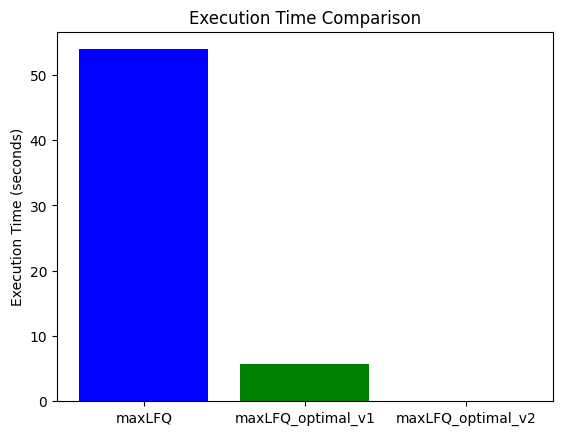

In [45]:
# Compare the maxLFQ maxLFQ_optimal_v1, and maxLFQ_optimal_v2 fuctions, and a more large dataset peptide_intensities3
compare_execution_time([maxLFQ, maxLFQ_optimal_v1, maxLFQ_optimal_v2], peptide_intensities3, ['maxLFQ', 'maxLFQ_optimal_v1', 'maxLFQ_optimal_v2'])

In [46]:
%time maxLFQ_optimal_v2(peptide_intensities3.to_numpy())

CPU times: user 87.4 ms, sys: 27.7 ms, total: 115 ms
Wall time: 47.4 ms


{'estimate': array([ 9.13107971, 10.00005333,  9.10793243,  8.50715702,  7.41268834,
         8.06149978,  8.39477514,  5.71005085,  8.51968927,  8.47282424,
         8.05728863,  8.7588018 ,  7.40198792,  9.34358333,  7.40071648,
         7.16348265,  9.57395501,  8.96987048,  7.88979466,  7.99759333,
         5.9837507 ,  9.06711547,  9.01128889,  8.04705662,  9.09695224,
         7.4297096 ,  8.88441612, 12.69317103, 10.29690515,  9.78215006,
         8.63571062, 10.32269217,  6.34289887,  8.9570992 ,  8.02209294,
         9.06052949,  8.42002457,  9.98889798, 10.86814387,  7.64183211,
        11.76058097,  7.75561118,  9.53676264, 11.28675912,  8.85916409,
         9.30244471,  8.71261088, 10.93982111,  7.79771336,  8.89398687,
         6.3230962 ,  7.4626312 ,  7.48797066,  8.85225802,  8.16733805,
        10.25690495,  7.62320284,  9.58080663,  6.61265019,  8.10950475,
        10.07332405,  7.0431158 , 10.12745547,  5.4014382 ,  6.68126884,
         8.10777165,  7.34623005,  9.23

## Benchmarking

### 初始的maxLFQ函数

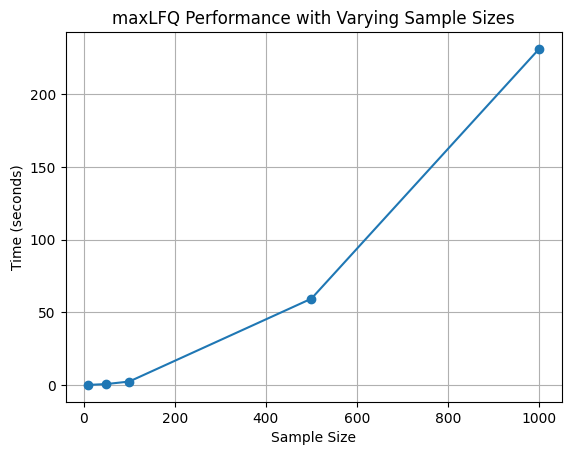

In [20]:
def measure_performance(sizes):
    times = []
    for size in sizes:
        data = generate_peptide_data(10, size, 0.1)
        start_time = time.time()
        maxLFQ(data)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# 测试不同的样本量
sample_sizes = [10, 50, 100, 500, 1000]
times = measure_performance(sample_sizes)

# 绘制性能曲线
plt.plot(sample_sizes, times, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Time (seconds)')
plt.title('maxLFQ Performance with Varying Sample Sizes')
plt.grid(True)
plt.show()

### `numpy`优化后的maxLFQ函数

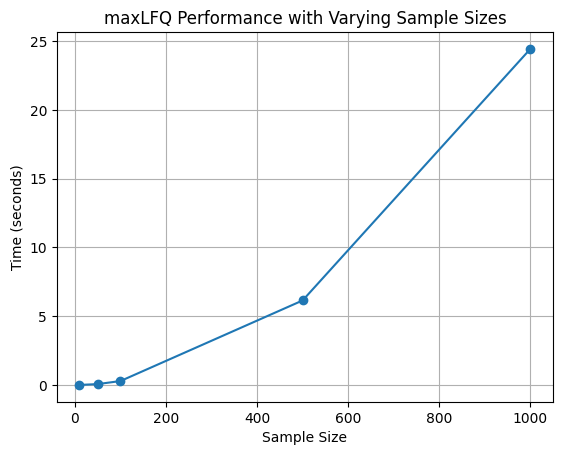

In [21]:
def measure_performance(sizes):
    times = []
    for size in sizes:
        data = generate_peptide_data(10, size, 0.1)
        start_time = time.time()
        maxLFQ_optimal_v1(data.to_numpy())
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# 测试不同的样本量
sample_sizes = [10, 50, 100, 500, 1000]
times = measure_performance(sample_sizes)

# 绘制性能曲线
plt.plot(sample_sizes, times, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Time (seconds)')
plt.title('maxLFQ Performance with Varying Sample Sizes')
plt.grid(True)
plt.show()

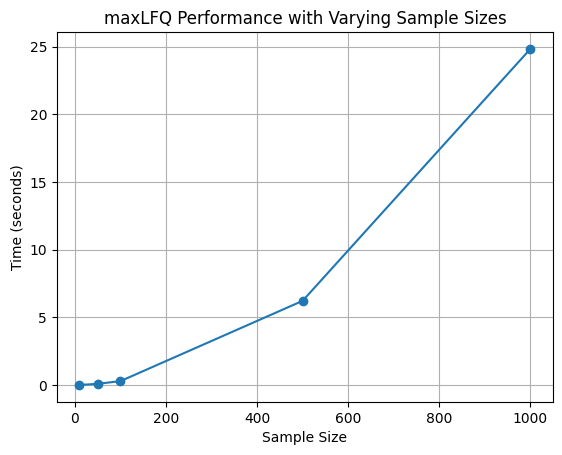

In [22]:
def measure_performance(sizes):
    times = []
    for size in sizes:
        data = generate_peptide_data(10, size, 0.1)
        start_time = time.time()
        maxLFQ_optimal_v1(data.to_numpy())
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# 测试不同的样本量
sample_sizes = [10, 50, 100, 500, 1000]
times = measure_performance(sample_sizes)

# 绘制性能曲线
plt.plot(sample_sizes, times, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Time (seconds)')
plt.title('maxLFQ Performance with Varying Sample Sizes')
plt.grid(True)
plt.show()

### 使用 `Numba` 加速 maxLFQ 算法

In [56]:
import numpy as np
from scipy.linalg import lstsq
import numba

@numba.jit
def spread(i, g, cc, X):
    # 优化后的 spread 函数
    g[i] = cc
    for r in range(X.shape[0]):
        if not np.isnan(X[r, i]):
            for k in range(X.shape[1]):
                if not np.isnan(X[r, k]) and np.isnan(g[k]):
                    spread(k, g, cc, X)

@numba.jit
def maxLFQ_do(X_sub):
    # 优化后的 maxLFQ_do 函数
    N = X_sub.shape[1]
    AtA = np.zeros((N, N))
    Atb = np.zeros(N)

    for i in range(N - 1):
        for j in range(i + 1, N):
            r_i_j = np.nanmedian(X_sub[:, j] - X_sub[:, i])
            if not np.isnan(r_i_j):
                AtA[i, j] = AtA[j, i] = -1
                AtA[i, i] += 1
                AtA[j, j] += 1
                Atb[i] -= r_i_j
                Atb[j] += r_i_j

    A = np.vstack([np.hstack([2 * AtA, np.ones((N, 1))]),
                    np.hstack([np.ones(N), 0])])
    b = np.append(2 * Atb, np.nanmean(X_sub) * N)

    res = lstsq(A, b, lapack_driver='gelsy')[0]

    return res[:N]

def maxLFQ_optimal_v2(X):
    # 检查数据是否全部为空
    if X.size == 0:
        return {"estimate": np.nan, "annotation": "Empty array"}
    if np.isnan(X).all():
        return {"estimate": np.nan, "annotation": "All NaN values"}

    # 处理单行数据
    if X.shape[0] == 1:
        return {"estimate": X[0], "annotation": [""]}

    N = X.shape[1]

    # 使用 numba 加速的函数调用
    cc = 0
    g = np.full(N, np.nan)
    for i in range(N):
        if np.isnan(g[i]):
            cc += 1
            spread(i, g, cc, X)

    w = np.full(N, np.nan)
    for i in range(1, cc + 1):
        ind = np.where(g == i)[0]
        if len(ind) == 1:
            w[ind[0]] = np.nanmedian(X[:, ind[0]])
        else:
            X_sub = X[:, ind]
            results = maxLFQ_do(X_sub)
            w[ind] = results

    # Check for all NaN results
    if np.isnan(w).all():
        return {"estimate": w, "annotation": "NA"}
    
    # Preparing final results
    annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
    return {"estimate": w, "annotation": annotation}


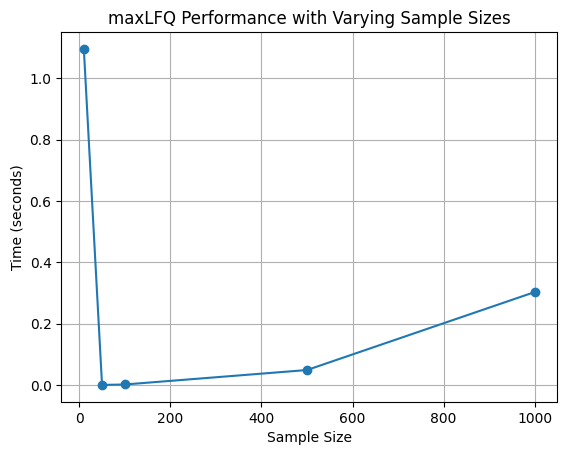

In [57]:
def measure_performance(sizes):
    times = []
    for size in sizes:
        data = generate_peptide_data(10, size, 0.1)
        start_time = time.time()
        maxLFQ_optimal_v2(data.to_numpy())
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# 测试不同的样本量
sample_sizes = [10, 50, 100, 500, 1000]
times = measure_performance(sample_sizes)

# 绘制性能曲线
plt.plot(sample_sizes, times, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Time (seconds)')
plt.title('maxLFQ Performance with Varying Sample Sizes')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from scipy.linalg import lstsq
from numba import njit

@njit
def maxLFQ_optimal_v3(X):
    """
    Perform the maxLFQ algorithm on a given set of protein/peptide abundance data.

    This function applies the maxLFQ (maximum label-free quantification) algorithm,
    which is used for estimating the abundance of proteins/peptides in mass spectrometry-based
    proteomics data. It includes handling of missing values and grouping of samples for comparison.

    Args:
        X (np.ndarray): A 2D array containing the protein/peptide abundance data. Rows represent
                        proteins/peptides, and columns represent samples.

    Returns:
        dict: A dictionary with two keys: 'estimate' containing the estimated abundances and
                'annotation' containing group annotations.

    Example:
        >>> data = np.random.rand(10, 5)
        >>> result = maxLFQ(data)
        >>> print(result)

    Note:
        This is an optimized version of the algorithm, designed for large-scale computations.
    """
    try:
        # Check if array is empty or all values are NaN
        if X.size == 0:
            raise ValueError("Input array is empty.")
        if np.isnan(X).all():
            raise ValueError("All values in the input array are NaN.")

        # Handle single row case
        if X.shape[0] == 1:
            return {'estimate': X[0], 'annotation': [""]}

        N = X.shape[1]

        @njit
        def spread(i, g, cc):
            # Spread function for assigning group labels
            g[i] = cc
            for r in range(X.shape[0]):
                if not np.isnan(X[r, i]):
                    for k in range(X.shape[1]):
                        if not np.isnan(X[r, k]) and np.isnan(g[k]):
                            spread(k, g, cc)

        @njit
        def maxLFQ_do(X_sub):
            # maxLFQ algorithm implementation
            N = X_sub.shape[1]
            AtA = np.zeros((N, N))
            Atb = np.zeros(N)

            for i in range(N - 1):
                for j in range(i + 1, N):
                    r_i_j = np.nanmedian(X_sub[:, j] - X_sub[:, i])
                    if not np.isnan(r_i_j):
                        AtA[i, j] = AtA[j, i] = -1
                        AtA[i, i] += 1
                        AtA[j, j] += 1
                        Atb[i] -= r_i_j
                        Atb[j] += r_i_j

            A = np.vstack([np.hstack([2 * AtA, np.ones((N, 1))]), 
                           np.hstack([np.ones(N), 0])])
            b = np.append(2 * Atb, np.nanmean(X_sub) * N)

            res = lstsq(A, b, lapack_driver='gelsy')[0]
            return res[:N]

        # Applying the maxLFQ algorithm
        cc = 0
        g = np.full(N, np.nan)
        for i in range(N):
            if np.isnan(g[i]):
                cc += 1
                spread(i, g, cc)

        w = np.full(N, np.nan)
        for i in range(1, cc + 1):
            ind = np.where(g == i)[0]
            if len(ind) == 1:
                w[ind[0]] = np.nanmedian(X[:, ind[0]])
            else:
                X_sub = X[:, ind]
                results = maxLFQ_do(X_sub)
                w[ind] = results

        # Check for all NaN results
        if np.isnan(w).all():
            raise ValueError("maxLFQ calculation resulted in all NaN values.")

        # Preparing final results
        annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
        return {"estimate": w, "annotation": annotation}

    except ValueError as ve:
        return {"error": str(ve)}
    except Exception as e:
        return {"error": f"An unexpected error occurred: {str(e)}"}


In [11]:
class MaxLFQOptimizer:
    """
    A class for optimizing the maxLFQ algorithm using Numba for faster computation.

    This class contains methods for performing the maxLFQ quantification algorithm on mass spectrometry data.
    It is optimized with Numba to improve performance.

    Methods:
        spread(i, g, cc, X): Assigns group labels to elements in a matrix.
        maxLFQ_do(X_sub): Performs the maxLFQ algorithm on a subset of the data.
        maxLFQ_optimal_v2(X): Applies the maxLFQ algorithm to the given data matrix.

    Usage:
        >>> optimizer = MaxLFQOptimizer()
        >>> data = np.array([[np.nan, 1, 2], [np.nan, np.nan, 2], [3, 4, np.nan]])
        >>> result = optimizer.maxLFQ_optimal_v2(data)
        >>> print(result)

    Note:
        This is an optimized version of the algorithm, designed for large-scale computations.
    """

    def __init__(self):
        """ Initializes the MaxLFQOptimizer class. """
        pass


    @staticmethod
    @numba.jit
    def _spread(i, g, cc, X):
        """
        Recursively assigns group labels to elements in a matrix.

        Args:
            i (int): The current column index in the matrix.
            g (np.ndarray): An array to store group labels.
            cc (int): The current group label.
            X (np.ndarray): The input data matrix.

        This method is part of the maxLFQ algorithm and is optimized with Numba.
        It assigns group labels to elements in X, based on their non-NaN status and connectivity.
        """
        g[i] = cc
        for r in range(X.shape[0]):
            if not np.isnan(X[r, i]):
                for k in range(X.shape[1]):
                    if not np.isnan(X[r, k]) and np.isnan(g[k]):
                        MaxLFQOptimizer._spread(k, g, cc, X)

    @staticmethod
    @numba.jit
    def _maxLFQ_do(X_sub):
        """
        Performs the maxLFQ algorithm on a subset of the data.

        Args:
            X_sub (np.ndarray): A subset of the original data matrix.

        Returns:
            np.ndarray: The results of the maxLFQ algorithm on X_sub.

        This method implements the maxLFQ algorithm, optimized with Numba. It calculates the relative
        quantities of peptides/proteins from the input LC-MS/MS data.
        """
        N = X_sub.shape[1]
        AtA = np.zeros((N, N))
        Atb = np.zeros(N)

        for i in range(N - 1):
            for j in range(i + 1, N):
                r_i_j = np.nanmedian(X_sub[:, j] - X_sub[:, i])
                if not np.isnan(r_i_j):
                    AtA[i, j] = AtA[j, i] = -1
                    AtA[i, i] += 1
                    AtA[j, j] += 1
                    Atb[i] -= r_i_j
                    Atb[j] += r_i_j

        A = np.vstack([np.hstack([2 * AtA, np.ones((N, 1))]),
                        np.hstack([np.ones(N), 0])])
        b = np.append(2 * Atb, np.nanmean(X_sub) * N)

        res = lstsq(A, b, lapack_driver='gelsy')[0]

        return res[:N]

    def maxLFQ_fast(self, X):
        """
        Applies the maxLFQ algorithm to the given data matrix.

        Args:
            X (np.ndarray): A data matrix where rows represent samples and columns represent features.

        Returns:
            dict: A dictionary with two keys: 'estimate' containing the quantification result, and
                  'annotation' containing information about the calculation or errors.

        This method checks for empty or NaN-only data, handles single-row data, assigns group labels,
        and applies the maxLFQ algorithm to each group of features.
        """
        if X.size == 0:
            return {"estimate": np.nan, "annotation": "Empty array"}
        if np.isnan(X).all():
            return {"estimate": np.nan, "annotation": "All NaN values"}

        # Handle single row case
        if X.shape[0] == 1:
            return {"estimate": X[0], "annotation": [""]}

        N = X.shape[1]

        # 使用 numba 加速的函数调用
        cc = 0
        g = np.full(N, np.nan)
        for i in range(N):
            if np.isnan(g[i]):
                cc += 1
                self._spread(i, g, cc, X)

        w = np.full(N, np.nan)
        for i in range(1, cc + 1):
            ind = np.where(g == i)[0]
            if len(ind) == 1:
                w[ind[0]] = np.nanmedian(X[:, ind[0]])
            else:
                X_sub = X[:, ind]
                results = self._maxLFQ_do(X_sub)
                w[ind] = results

        # Check for all NaN results
        if np.isnan(w).all():
            return {"estimate": w, "annotation": "NA"}
        
        # Preparing final results
        annotation = ";".join(map(str, g)) if np.any(np.isnan(w)) else ""
        return {"estimate": w, "annotation": annotation}

In [12]:
# Example usage:
# Create an instance of MaxLFQOptimizer
optimizer = MaxLFQOptimizer()

# Apply the maxLFQ_optimal_v2 method
result = optimizer.maxLFQ_fast(peptide_intensities3.to_numpy())   

# Print the result
print(result)

{'estimate': array([ 9.13107971, 10.00005333,  9.10793243,  8.50715702,  7.41268834,
        8.06149978,  8.39477514,  5.71005085,  8.51968927,  8.47282424,
        8.05728863,  8.7588018 ,  7.40198792,  9.34358333,  7.40071648,
        7.16348265,  9.57395501,  8.96987048,  7.88979466,  7.99759333,
        5.9837507 ,  9.06711547,  9.01128889,  8.04705662,  9.09695224,
        7.4297096 ,  8.88441612, 12.69317103, 10.29690515,  9.78215006,
        8.63571062, 10.32269217,  6.34289887,  8.9570992 ,  8.02209294,
        9.06052949,  8.42002457,  9.98889798, 10.86814387,  7.64183211,
       11.76058097,  7.75561118,  9.53676264, 11.28675912,  8.85916409,
        9.30244471,  8.71261088, 10.93982111,  7.79771336,  8.89398687,
        6.3230962 ,  7.4626312 ,  7.48797066,  8.85225802,  8.16733805,
       10.25690495,  7.62320284,  9.58080663,  6.61265019,  8.10950475,
       10.07332405,  7.0431158 , 10.12745547,  5.4014382 ,  6.68126884,
        8.10777165,  7.34623005,  9.23335943,  7.07

In [30]:
import sys
sys.path.append('staver/MaxLFQ.py')
# print(sys.path)  # 打印出来看看是否包含了正确的路径
from MaxLFQ import maxLFQ_optimal_v2

In [34]:
%time maxLFQ_optimal_v2(peptide_intensities3.to_numpy())

CPU times: user 87.2 ms, sys: 26.2 ms, total: 113 ms
Wall time: 45.7 ms


{'estimate': array([ 9.13107971, 10.00005333,  9.10793243,  8.50715702,  7.41268834,
         8.06149978,  8.39477514,  5.71005085,  8.51968927,  8.47282424,
         8.05728863,  8.7588018 ,  7.40198792,  9.34358333,  7.40071648,
         7.16348265,  9.57395501,  8.96987048,  7.88979466,  7.99759333,
         5.9837507 ,  9.06711547,  9.01128889,  8.04705662,  9.09695224,
         7.4297096 ,  8.88441612, 12.69317103, 10.29690515,  9.78215006,
         8.63571062, 10.32269217,  6.34289887,  8.9570992 ,  8.02209294,
         9.06052949,  8.42002457,  9.98889798, 10.86814387,  7.64183211,
        11.76058097,  7.75561118,  9.53676264, 11.28675912,  8.85916409,
         9.30244471,  8.71261088, 10.93982111,  7.79771336,  8.89398687,
         6.3230962 ,  7.4626312 ,  7.48797066,  8.85225802,  8.16733805,
        10.25690495,  7.62320284,  9.58080663,  6.61265019,  8.10950475,
        10.07332405,  7.0431158 , 10.12745547,  5.4014382 ,  6.68126884,
         8.10777165,  7.34623005,  9.23

In [33]:
%time optimizer.maxLFQ_fast(peptide_intensities3.to_numpy())   

CPU times: user 2.53 s, sys: 36.4 ms, total: 2.57 s
Wall time: 2.52 s


{'estimate': array([ 9.13107971, 10.00005333,  9.10793243,  8.50715702,  7.41268834,
         8.06149978,  8.39477514,  5.71005085,  8.51968927,  8.47282424,
         8.05728863,  8.7588018 ,  7.40198792,  9.34358333,  7.40071648,
         7.16348265,  9.57395501,  8.96987048,  7.88979466,  7.99759333,
         5.9837507 ,  9.06711547,  9.01128889,  8.04705662,  9.09695224,
         7.4297096 ,  8.88441612, 12.69317103, 10.29690515,  9.78215006,
         8.63571062, 10.32269217,  6.34289887,  8.9570992 ,  8.02209294,
         9.06052949,  8.42002457,  9.98889798, 10.86814387,  7.64183211,
        11.76058097,  7.75561118,  9.53676264, 11.28675912,  8.85916409,
         9.30244471,  8.71261088, 10.93982111,  7.79771336,  8.89398687,
         6.3230962 ,  7.4626312 ,  7.48797066,  8.85225802,  8.16733805,
        10.25690495,  7.62320284,  9.58080663,  6.61265019,  8.10950475,
        10.07332405,  7.0431158 , 10.12745547,  5.4014382 ,  6.68126884,
         8.10777165,  7.34623005,  9.23